# Gaussian Mixture Models

`StatTools` implements parameter estimation for Gaussian mixture models using the EM algorithm in its `mixture.GaussianMixture` class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)

from stattools.mixture import GaussianMixture
from stattools.smoothing import KernelDensityEstimator
from stattools.datasets import load_old_faithful

## Example: Old Faithful data set

Our data consist of 272 pairs of eruption durations and waiting times until the next eruption (both measured in minutes) of the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.

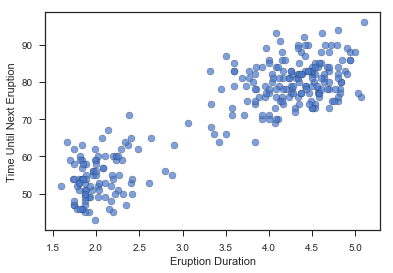

In [2]:
data = load_old_faithful()

plt.figure()
plt.scatter(data.Duration, data.Wait, edgecolor="k", alpha=0.7)
plt.xlabel("Eruption Duration")
plt.ylabel("Time Until Next Eruption")
plt.show()
plt.close()

The scatter plot shows two clear clusters, suggesting a Gaussian mixture model with two components.

In [3]:
%%time
gmm = GaussianMixture(k=2)
gmm.fit(data, random_state=0)
print(f"Final log-likelihood:                          {gmm.log_likelihood(data):.3f}")
print(f"Akaike information criterion (AIC):            {gmm.aic(data, correction=False):.3f}")
print(f"Corrected Akaike information criterion (AICc): {gmm.aic(data):.3f}")
print(f"Bayesian  information criterion (BIC):         {gmm.bic(data):.3f}")

Final log-likelihood:                          -1130.272
Akaike information criterion (AIC):            2282.544
Corrected Akaike information criterion (AICc): 2261.559
Bayesian  information criterion (BIC):         2322.208
CPU times: user 1.35 s, sys: 20.8 ms, total: 1.37 s
Wall time: 1.4 s


We can plot the contours of the estimated density function using the `plot()` method.

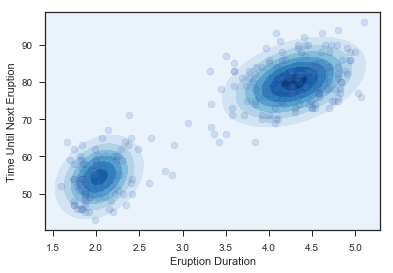

In [4]:
plt.figure()
plt.scatter(data.Duration, data.Wait, edgecolor="k", alpha=0.2)
gmm.plot(cmap="Blues", zorder=0)
plt.xlabel("Eruption Duration")
plt.ylabel("Time Until Next Eruption")
plt.show()
plt.close()

We can also use Gaussian mixture models as unsupervised classifiers.

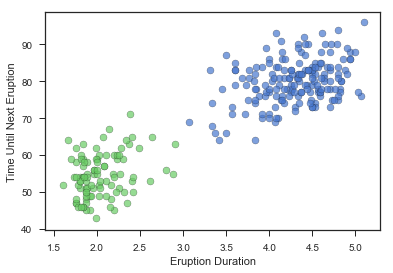

In [5]:
labels = gmm.predict(data)
x = data.Duration
y = data.Wait
plt.figure()
for i in range(2):
    plt.scatter(x[labels == i], y[labels == i], edgecolor="k", alpha=0.7)
plt.xlabel("Eruption Duration")
plt.ylabel("Time Until Next Eruption")
plt.show()
plt.close()

## Example: Simulated 1D mixture

We will simulate data from a mixture of three different one-dimensional Gaussian distributions.

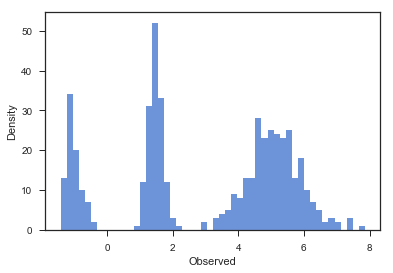

In [6]:
# Random number generator
rs = np.random.RandomState(1)

# True parameters
weights = [0.2, 0.3, 0.5]
means = [-1, 1.5, 5]
stds = [0.25, 0.25, 0.8]

# Generate mixture data
n = 500
x = np.empty(shape=(n,), dtype=float)
for i in range(n):
    j = rs.choice(np.arange(3), p=weights)
    x[i] = rs.normal(loc=means[j], scale=stds[j])

plt.figure()
plt.hist(x, bins=50, color="b", alpha=0.8)
plt.xlabel("Observed")
plt.ylabel("Density")
plt.show()
plt.close()

In [7]:
%%time
gmm = GaussianMixture(k=3)
gmm.fit(x, random_state=rs)
print("Estimates:")
print(f"Means:               {gmm.means.reshape(-1)}")
print(f"Standard deviations: {np.sqrt(gmm.covs.reshape(-1))}")
print(f"Weights:             {gmm.weights.reshape(-1)}")

Estimates:
Means:               [ 5.10720883  1.47615193 -1.00690415]
Standard deviations: [0.82113943 0.22075027 0.23083028]
Weights:             [0.53813577 0.28986423 0.172     ]
CPU times: user 2.14 s, sys: 27.4 ms, total: 2.17 s
Wall time: 2.23 s


We can plot the Gaussian mixture model density estimate using the `plot()` method.

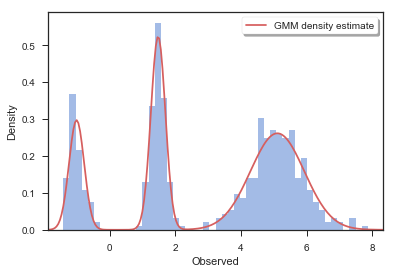

In [8]:
plt.figure()
plt.hist(x, bins=50, density=True, color="b", alpha=0.5)
gmm.plot(c="r", label="GMM density estimate")
plt.legend(loc="best", frameon=True, shadow=True)
plt.xlabel("Observed")
plt.ylabel("Density")
plt.show()
plt.close()